## ***PREDICTION OF WALMART SALES BASED ON ITEM TYPE USING DIFFERENT REGRESSION METHODS***

**Group Members:**

**Group Number - 17**

**Priya Kandula - 0754438**

**Venkata Hanuman Sai Kumar Kaparaju - 0753837**

**Venkata Kalyan Ram Ghatti - 0756328**

**Harish Veeramosu - 0755976**

Our main agenda is to predict sales for upcoming month on diiferent items sold given major features such as item type, outlet type, MRP, product sales, Item weight. 

We are predicting sales based on 16 Item types which include 'Soft Drinks', 'Dairy', 'Hard Drinks', 'Canned', 'Frozen Foods',       'Fruits and Vegetables', 'Snack Foods', 'Baking Goods',
       'Starchy Foods', 'Meat', 'Seafood', 'Breakfast', 'Breads',
       'Health and Hygiene', 'Household', 'Others'. *italicized text*

## Importing Standard Libraries

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py

## Importing Walmart sales data into data frame 'df'

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('walmart_sales_data.csv')

Saving walmart_sales_data.csv to walmart_sales_data.csv


In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Product_sales,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.60,Low Fat,0.00%,Soft Drinks,141.62,OUT045,3829.02,2002,NaN,Tier 2,Supermarket Type1,3829.02
1,DRA12,11.60,Low Fat,6.85%,Soft Drinks,143.02,OUT010,283.63,1998,NaN,Tier 3,Grocery Store,283.63
2,DRA12,11.60,Low Fat,4.11%,Soft Drinks,142.02,OUT018,850.89,2009,Medium,Tier 3,Supermarket Type2,850.89
3,DRA12,11.60,Low Fat,4.09%,Soft Drinks,142.32,OUT013,2552.68,1987,High,Tier 3,Supermarket Type1,2552.68
4,DRA12,11.60,Low Fat,4.12%,Soft Drinks,140.32,OUT017,2552.68,2007,NaN,Tier 2,Supermarket Type1,2552.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCZ54,14.65,Low Fat,8.34%,Household,161.96,OUT046,4711.20,1997,Small,Tier 1,Supermarket Type1,4711.20
8519,NCZ54,14.65,Low Fat,8.37%,Household,163.46,OUT018,2599.28,2009,Medium,Tier 3,Supermarket Type2,2599.28
8520,NCZ54,14.65,Low Fat,8.35%,Household,162.46,OUT045,2274.37,2002,NaN,Tier 2,Supermarket Type1,2274.37
8521,NCZ54,14.65,Low Fat,8.30%,Household,164.06,OUT027,5523.48,1985,Medium,Tier 3,Supermarket Type3,5523.48


## **Data Analysis of Walmart sales data**

In [4]:
df['Item_Type'].unique()

array(['Soft Drinks', 'Dairy', 'Hard Drinks', 'Canned', 'Frozen Foods',
       'Fruits and Vegetables', 'Snack Foods', 'Baking Goods',
       'Starchy Foods', 'Meat', 'Seafood', 'Breakfast', 'Breads',
       'Health and Hygiene', 'Household', 'Others'], dtype=object)

## Checking Shape

In [5]:
df.shape

(8523, 13)

## Columns in Walmart

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Item_Product_sales',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Info to check Null and data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   object 
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Item_Product_sales         8523 non-null   float64
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                6113 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage:

## Fetching first 5 records of the data

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Product_sales,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.6,Low Fat,0.00%,Soft Drinks,141.62,OUT045,3829.02,2002,NaN,Tier 2,Supermarket Type1,3829.02
1,DRA12,11.6,Low Fat,6.85%,Soft Drinks,143.02,OUT010,283.63,1998,NaN,Tier 3,Grocery Store,283.63
2,DRA12,11.6,Low Fat,4.11%,Soft Drinks,142.02,OUT018,850.89,2009,Medium,Tier 3,Supermarket Type2,850.89
3,DRA12,11.6,Low Fat,4.09%,Soft Drinks,142.32,OUT013,2552.68,1987,High,Tier 3,Supermarket Type1,2552.68
4,DRA12,11.6,Low Fat,4.12%,Soft Drinks,140.32,OUT017,2552.68,2007,NaN,Tier 2,Supermarket Type1,2552.68


## Identifying uniques number of items for every columns

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              1808
Item_Type                      16
Item_MRP                     4845
Outlet_Identifier              10
Item_Product_sales           3493
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

## Checking Null Values.
## As we found that Outlet_Size would not impact the prediction of sales for the upcoming months so we dropped that particular column.


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Item_Product_sales              0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Obtaining stats for the output variable.
## We found the maximum sales for a given month was 13086.96 and the minimum was 33.29. However the average sales per month were 2181.28. Building a model to predict sales helps to overcome sales for items that are below the average mark.

In [12]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.289052
std       1706.499641
min         33.290000
25%        834.245000
50%       1794.330000
75%       3101.300000
max      13086.960000
Name: Item_Outlet_Sales, dtype: float64

## Visualization of Walmart sales data

## **Plot -1**

## From the below graph we are able to visualize the sales of the outlet with respect to Item type. From the walmart data , we have 16 different types of items that we have used to predict the outlet sales for upcoming months.

## It is observed that 'Starchy foods' was the highest selling item followed by seafood. However Baking goods was the least selling item for that month.

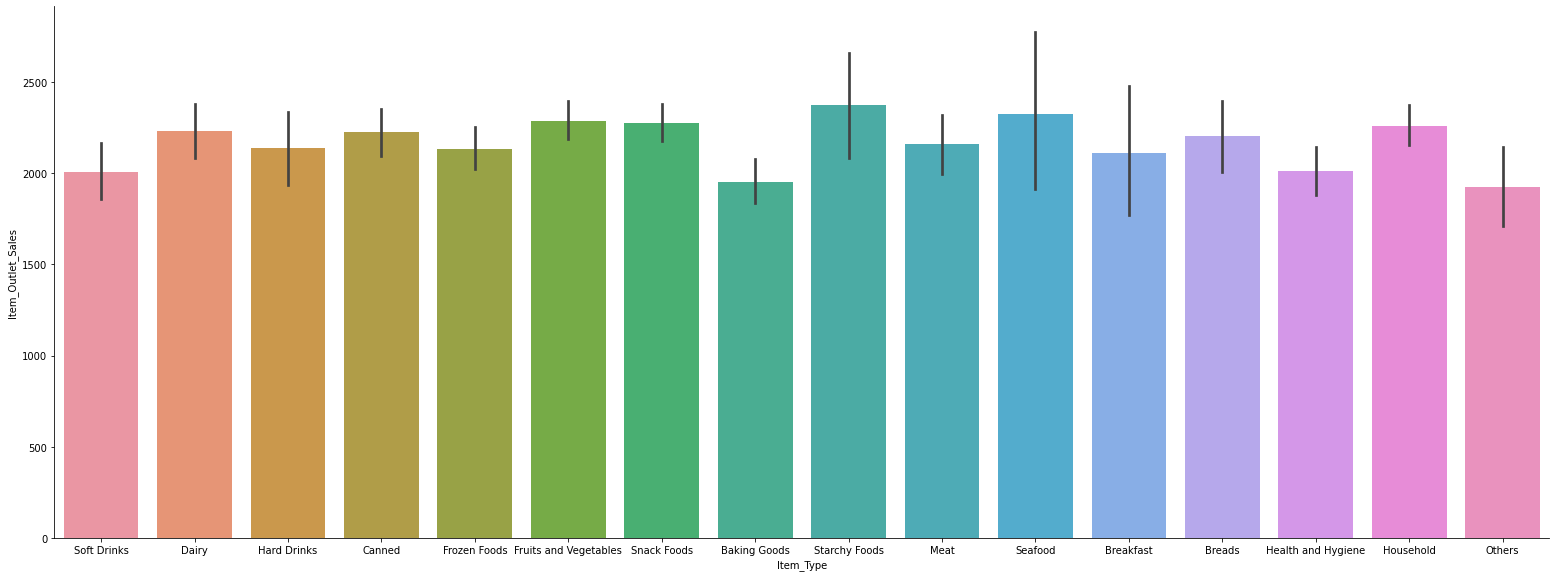

In [13]:
g=sns.catplot(x='Item_Type',y='Item_Outlet_Sales',kind = 'bar',data=df)

g.fig.set_figwidth(25)
g.fig.set_figheight(8.27)

## **Plot-2**

## From the below graph we are able to visualize the sales of the outlet with respect to Item type. From the walmart data , we have 16 different types of items that we have used to predict the outlet sales for upcoming months based on the type of outlet.

## We can tell that Supermarket type 3 has highest sales for Breakfast. Apart from Breakfast we can observe that this category of outlet has registed highest sales for various item types.

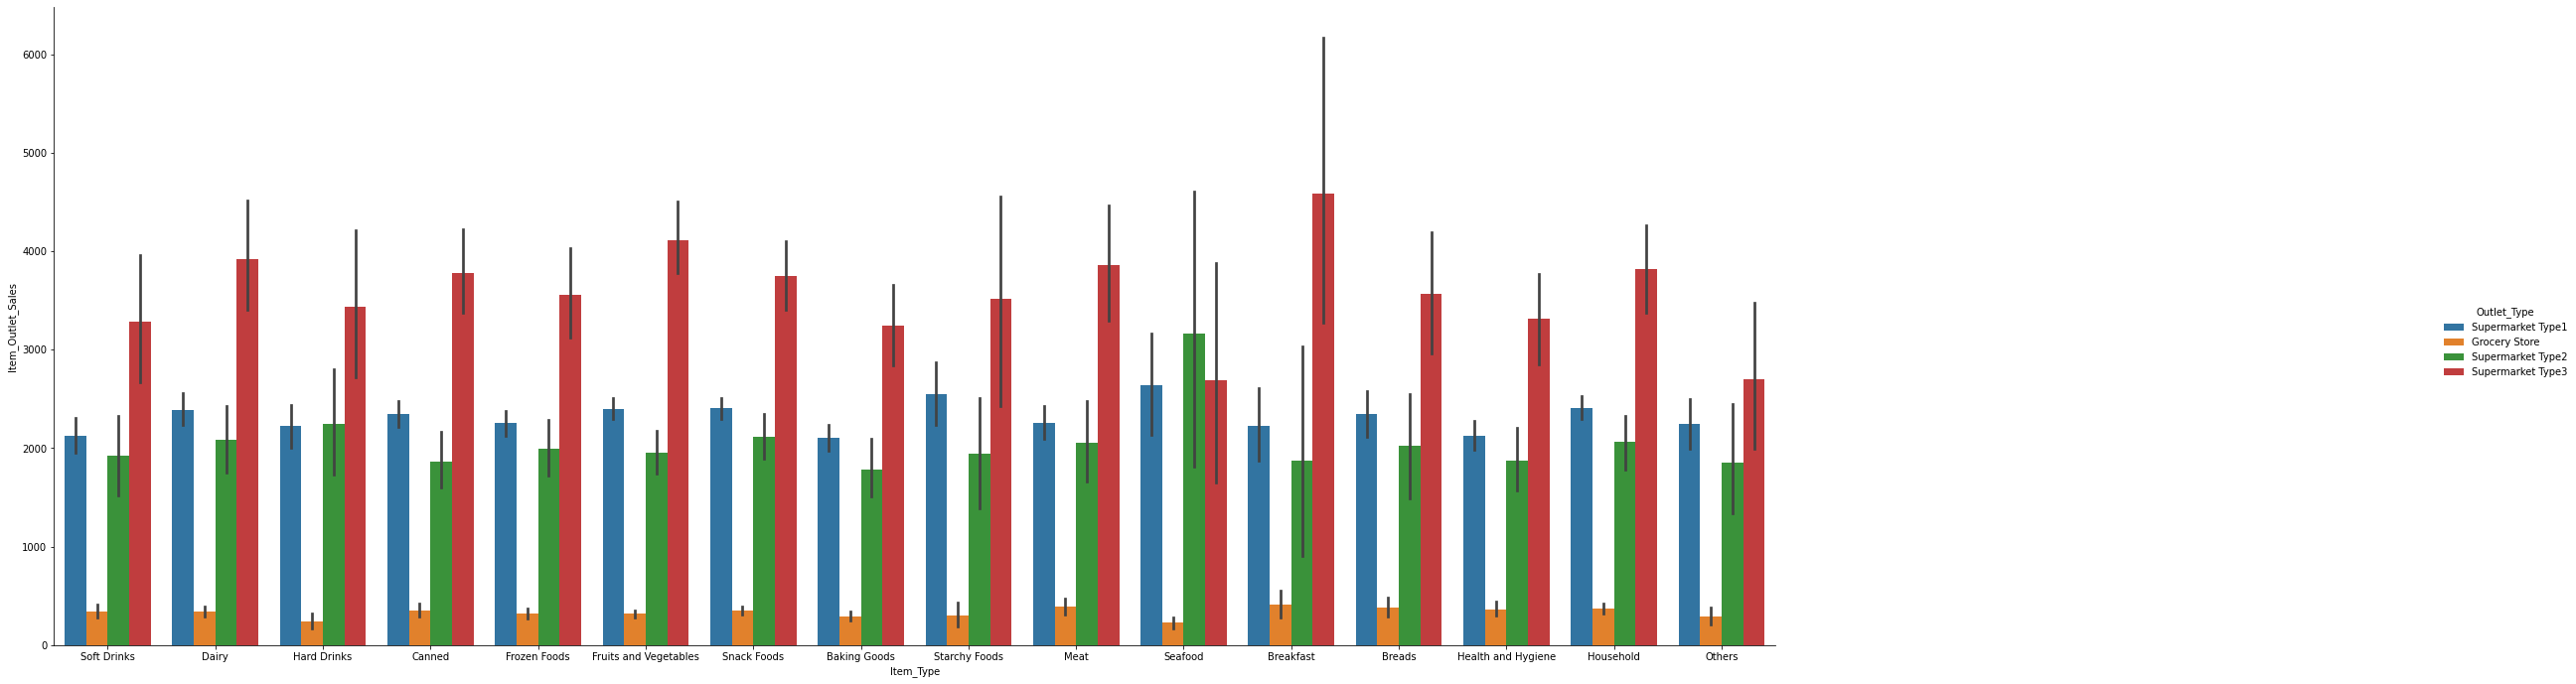

In [14]:
g=sns.catplot(x='Item_Type',y='Item_Outlet_Sales',hue ='Outlet_Type',kind = 'bar',data=df)

g.fig.set_figwidth(40)
g.fig.set_figheight(10)

## Plot -3

## From the below visualization we can observe that customers who prefer to have Regular fat items are slightly higher than customers who prefer low fat items. However the difference between their sales is very minor. 

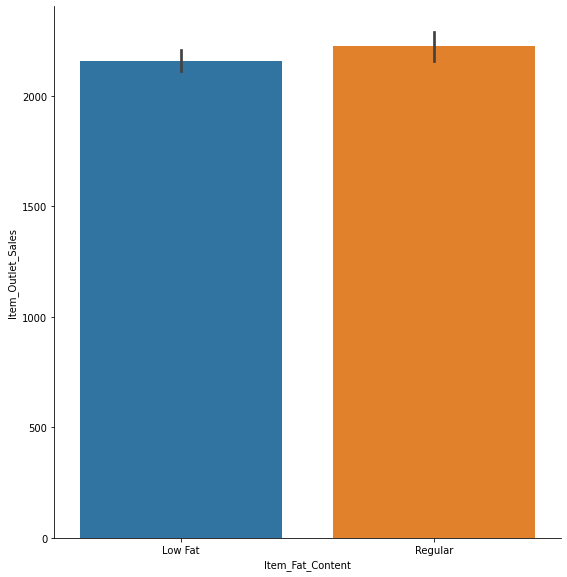

In [15]:
g=sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',kind = 'bar',data=df)

g.fig.set_figwidth(8.27)
g.fig.set_figheight(8.27)

## Building a co-relation matrix between features 

In [56]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [59]:
#convert to array
corr_array  = np.array(correlation)

In [60]:
correlation

,Item_Weight,Item_MRP,Item_Product_sales,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,0.026055,0.012973,-0.013096,0.012973
Item_MRP,0.026055,1.000000,0.567575,0.005020,0.567575
Item_Product_sales,0.012973,0.567575,1.000000,-0.049135,1.000000
Outlet_Establishment_Year,-0.013096,0.005020,-0.049135,1.000000,-0.049135
Item_Outlet_Sales,0.012973,0.567575,1.000000,-0.049135,1.000000


In [65]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## Plots for all Feature Variables

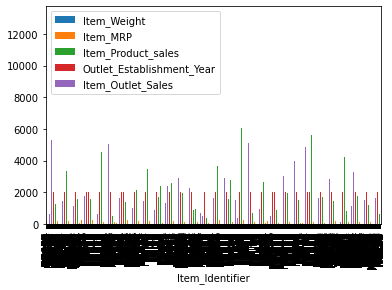

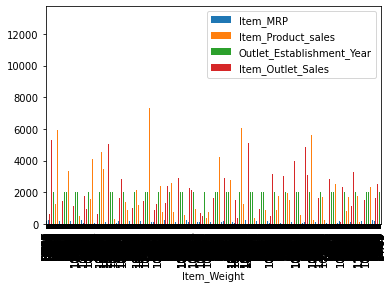

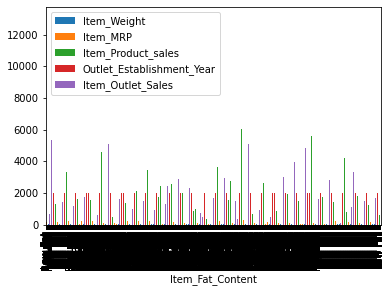

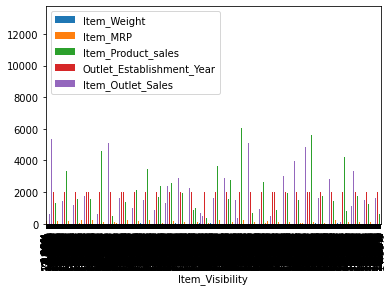

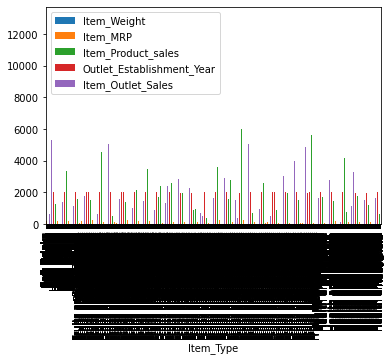

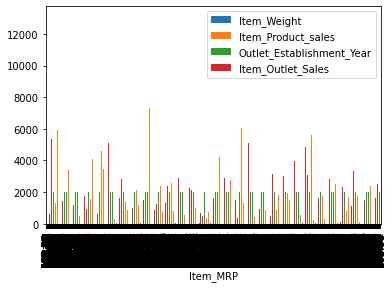

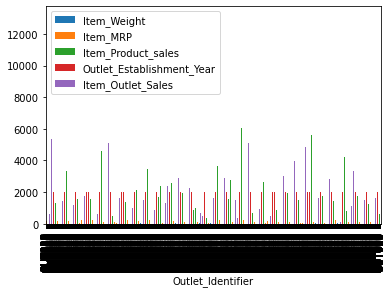

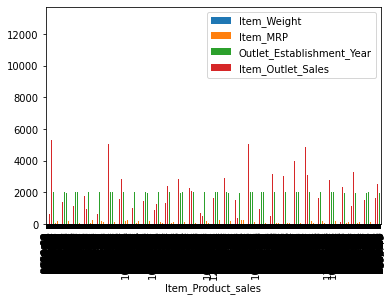

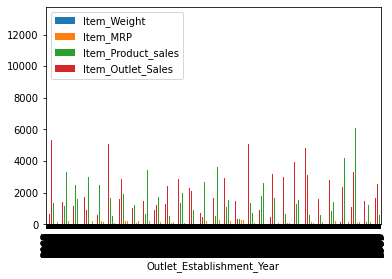

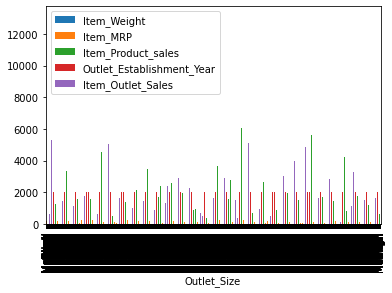

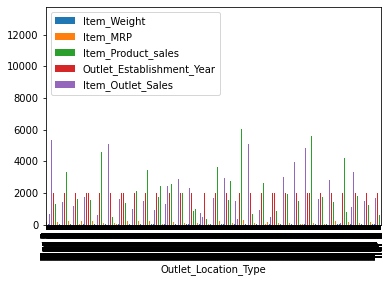

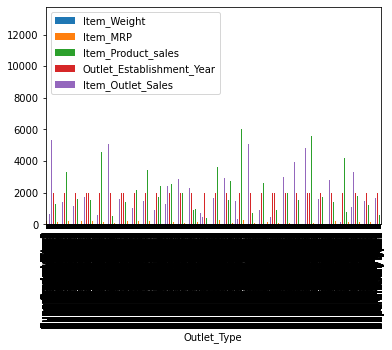

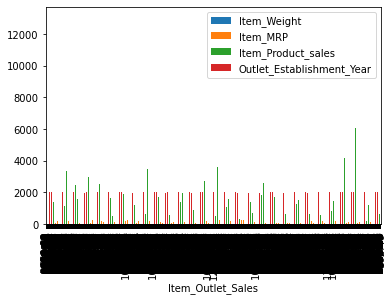

In [70]:
for i in df.columns:
  df.plot(i,kind='bar')

## **Data PreProcessing**

## Preparing dataset for training the model

## Codes to identify items or outlets and size of the outlet are irrelevant to predict sales of an item and adds minimum to no value to a model and the prediction of sales. so we are dropping those columns.

## Dropping Item_Outlet_Sales as it is our target variable.

In [18]:
x=df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Size','Item_Outlet_Sales'],axis=1)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Product_sales,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,11.60,Low Fat,0.00%,Soft Drinks,141.62,3829.02,2002,Tier 2,Supermarket Type1
1,11.60,Low Fat,6.85%,Soft Drinks,143.02,283.63,1998,Tier 3,Grocery Store
2,11.60,Low Fat,4.11%,Soft Drinks,142.02,850.89,2009,Tier 3,Supermarket Type2
3,11.60,Low Fat,4.09%,Soft Drinks,142.32,2552.68,1987,Tier 3,Supermarket Type1
4,11.60,Low Fat,4.12%,Soft Drinks,140.32,2552.68,2007,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,14.65,Low Fat,8.34%,Household,161.96,4711.20,1997,Tier 1,Supermarket Type1
8519,14.65,Low Fat,8.37%,Household,163.46,2599.28,2009,Tier 3,Supermarket Type2
8520,14.65,Low Fat,8.35%,Household,162.46,2274.37,2002,Tier 2,Supermarket Type1
8521,14.65,Low Fat,8.30%,Household,164.06,5523.48,1985,Tier 3,Supermarket Type3


## **Label Encoder for categorical variables**

## We are using label encoder to convert categorical values in the dataset to continous variables so as to support in training the regression model.

## We are converting 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type_str' to continous variables.

In [19]:
x
le = preprocessing.LabelEncoder()

x["Item_Fat_Content_str"] = le.fit_transform(x["Item_Fat_Content"])
x[["Item_Fat_Content", "Item_Fat_Content_str"]]

x["Item_Type_str"] = le.fit_transform(x["Item_Type"])
x[["Item_Type", "Item_Type_str"]]

x["Outlet_Location_Type_str"] = le.fit_transform(x["Outlet_Location_Type"])
x[["Outlet_Location_Type", "Outlet_Location_Type_str"]]

x["Outlet_Type_str"] = le.fit_transform(x["Outlet_Type"])
x[["Outlet_Type", "Outlet_Type_str"]]

x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Product_sales,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_str,Item_Type_str,Outlet_Location_Type_str,Outlet_Type_str
0,11.60,Low Fat,0.00%,Soft Drinks,141.62,3829.02,2002,Tier 2,Supermarket Type1,0,14,1,1
1,11.60,Low Fat,6.85%,Soft Drinks,143.02,283.63,1998,Tier 3,Grocery Store,0,14,2,0
2,11.60,Low Fat,4.11%,Soft Drinks,142.02,850.89,2009,Tier 3,Supermarket Type2,0,14,2,2
3,11.60,Low Fat,4.09%,Soft Drinks,142.32,2552.68,1987,Tier 3,Supermarket Type1,0,14,2,1
4,11.60,Low Fat,4.12%,Soft Drinks,140.32,2552.68,2007,Tier 2,Supermarket Type1,0,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,14.65,Low Fat,8.34%,Household,161.96,4711.20,1997,Tier 1,Supermarket Type1,0,9,0,1
8519,14.65,Low Fat,8.37%,Household,163.46,2599.28,2009,Tier 3,Supermarket Type2,0,9,2,2
8520,14.65,Low Fat,8.35%,Household,162.46,2274.37,2002,Tier 2,Supermarket Type1,0,9,1,1
8521,14.65,Low Fat,8.30%,Household,164.06,5523.48,1985,Tier 3,Supermarket Type3,0,9,2,3


## Dropping categorical columns after they are label encoded.

In [20]:
X = x.drop(['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Item_Visibility'],axis=1)

## This is the processed dataset for training a regression model with continuos data of 8523 rows and 8 columns.

## Features for training the model.

In [21]:
X

,Item_Weight,Item_MRP,Item_Product_sales,Outlet_Establishment_Year,Item_Fat_Content_str,Item_Type_str,Outlet_Location_Type_str,Outlet_Type_str
0,11.60,141.62,3829.02,2002,0,14,1,1
1,11.60,143.02,283.63,1998,0,14,2,0
2,11.60,142.02,850.89,2009,0,14,2,2
3,11.60,142.32,2552.68,1987,0,14,2,1
4,11.60,140.32,2552.68,2007,0,14,1,1
...,...,...,...,...,...,...,...,...
8518,14.65,161.96,4711.20,1997,0,9,0,1
8519,14.65,163.46,2599.28,2009,0,9,2,2
8520,14.65,162.46,2274.37,2002,0,9,1,1
8521,14.65,164.06,5523.48,1985,0,9,2,3


## Target Variable


In [22]:
y=df['Item_Outlet_Sales']

In [23]:
y

0       3829.02
1        283.63
2        850.89
3       2552.68
4       2552.68
         ...   
8518    4711.20
8519    2599.28
8520    2274.37
8521    5523.48
8522     162.46
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Scaling walmart sales data using StandardScaler 

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled=scaler.transform(X)

## Scaled dataframe

In [25]:
X_scaled

array([[-0.27431779,  0.01007077,  0.9656185 , ...,  1.6089627 ,
        -0.13888236, -0.25265831],
       [-0.27431779,  0.03255296, -1.11208367, ...,  1.6089627 ,
         1.09156913, -1.50828907],
       [-0.27431779,  0.01649425, -0.77965273, ...,  1.6089627 ,
         1.09156913,  1.00297245],
       ...,
       [ 0.38217431,  0.34473426,  0.05454816, ...,  0.4212417 ,
        -0.13888236, -0.25265831],
       [ 0.38217431,  0.3704282 ,  1.95862159, ...,  0.4212417 ,
         1.09156913,  2.25860321],
       [ 0.38217431,  0.3206462 , -1.18309283, ...,  0.4212417 ,
        -1.36933384, -1.50828907]])

## **Splitting the dataset into the Training set and Test set**

## importing train_test_split from sklearn.model

## splitting the data in 80:20, where 80% of data is used for training and 20% of data for testing.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=48)

## We are building different regression models such as Linear regression and Random forest regression and choose the final model based on the accuracy of the model.


## **Linear Regression Model**

## we are training the model and predicting the target variable that is sales of the store.

## We are using r2_score as the regression metric to determine the accuracy of the model. Using Linear regression, model was able to predict sales with 100% accuracy. 

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# fit(input, output), in this order
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Make predictions using the testing set
y_pred = lr.predict(X_test)

In [33]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_pred, y_test))

Coefficients: 
 [ 2.45230050e-12 -2.27373675e-13  1.70639953e+03 -7.67386155e-13
 -5.21538368e-12  5.34328137e-12  1.46371804e-12  1.27897692e-12]
Mean squared error: 0.00
Coefficient of determination: 1.00


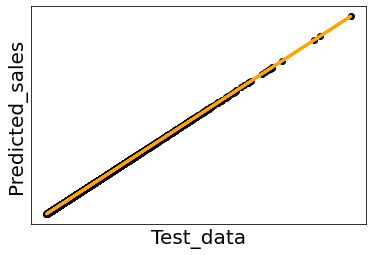

In [35]:
# Plot outputs
plt.scatter(y_pred, y_test,  color='black')
plt.plot(y_pred, y_test, color='orange', linewidth=3)
plt.xlabel('Test_data', fontsize = 20)
plt.ylabel('Predicted_sales', fontsize = 20)

plt.xticks(())
plt.yticks(())

plt.show()

## **Random Forest Regression Model**

## we are training the model and predicting the target variable that is sales of the store.

## We are using r2_score as the regression metric to determine the accuracy of the model. Using Random forest Regression , model was able to predict sales with 97.7% accuracy. 

In [36]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=48,n_estimators=10,max_features='auto')

# fit(input, output), in this order
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=48, verbose=0, warm_start=False)

In [37]:
# Make predictions using the testing set
y_pred= regr.predict(X_test)
y_pred

array([2376.80766996,  354.35976645, 2376.80766996, ...,  354.35976645,
       2376.80766996,  354.35976645])

In [41]:

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_pred, y_test))

Mean squared error: 62826.59
Coefficient of determination: 0.98


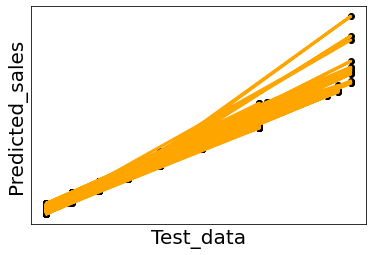

In [39]:
# Plot outputs
plt.scatter(y_pred, y_test,  color='black')
plt.plot(y_pred, y_test, color='orange', linewidth=3)
plt.xlabel('Test_data', fontsize = 20)
plt.ylabel('Predicted_sales', fontsize = 20)

plt.xticks(())
plt.yticks(())

plt.show()

## **Model Conclusion**

We predicted the sales for upcoming month for different items using Linear Regression and Random Forest Regression.

We decided to use Linear regression model over Random Forest Regression because of high accuracy in predicting sales.

The Linear regression consume less time compared to Random Forest Regression in Excecution.

